In [1]:
import pandas as pd 
import numpy as np 
import datetime

In [2]:
dataset = pd.read_csv(r"/Users/shikhathakur/Downloads/EURUSD_15m_BID_01.01.2010-31.12.2016.csv")

In [3]:
dataset.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [4]:
req_data = dataset[["High","Low","Close"]]
req_data1 = dataset["Time"]
print(req_data1)

0         2010-01-01 00:00
1         2010-01-01 00:15
2         2010-01-01 00:30
3         2010-01-01 00:45
4         2010-01-01 01:00
                ...       
245439    2016-12-31 22:45
245440    2016-12-31 23:00
245441    2016-12-31 23:15
245442    2016-12-31 23:30
245443    2016-12-31 23:45
Name: Time, Length: 245444, dtype: object


In [5]:
X_set= dataset[["High","Low"]]
Y_set = dataset["Close"]


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X_set,Y_set,test_size =0.2)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
lm = LinearRegression()
model = lm.fit(X_train,Y_train)
print("accuracy or determination score of train data", model.score(X_test,Y_test))



accuracy or determination score of train data 0.9999903994522947


In [8]:
y_predic = model.predict(X_test)

In [9]:
mse = mean_squared_error(Y_test,y_predic)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test,y_predic)
print("MEAN SQUARED ERROR --->" , mse)
print("ROOT MEAN SQUARED ERROR ----->",rmse)
print("MEAN ABSOLUTE ERROR---->",mae)


MEAN SQUARED ERROR ---> 1.2284829848678783e-07
ROOT MEAN SQUARED ERROR -----> 0.0003504972160899254
MEAN ABSOLUTE ERROR----> 0.00020001109171747486


In [10]:
#K-FOLD CROSS VALIDATION, k value here is taken as 5
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

kf =KFold(n_splits=5)
kf.get_n_splits(X_set)
kf
k_Cross = cross_val_score(LinearRegression(),X_set ,Y_set,cv=5)
print(k_Cross)

[0.99995497 0.99996487 0.99991785 0.9999924  0.99984247]


In [11]:
prediction = cross_val_predict(model,X_set,Y_set,cv=5)
print(prediction)

[1.43258468 1.43261977 1.43270984 ... 1.05149111 1.05149111 1.05149111]


<function matplotlib.pyplot.show(close=None, block=None)>

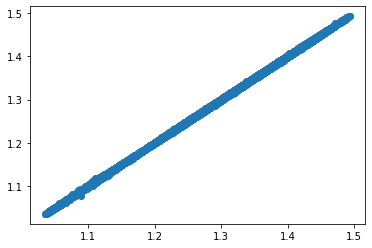

In [12]:
from matplotlib import pyplot as plt
plt.scatter(Y_set,prediction)
plt.show

In [24]:
dataset['year'] = dataset['Time'].dt.year
#extract the date fromt time 
dataset['month'] = dataset['Time'].dt.month

#df['day'] = df['date'].dt.day

dataset['Time']= pd.to_datetime(dataset['Time'],utc=True)
dataset['hours'] = dataset['Time'].dt.hour
dataset['minutes'] = dataset['Time'].dt.minute
x =dataset[['Time','year','month','hours','minutes']]
x.head(10)
#dataset.info()

,Time,year,month,hours,minutes
0,2010-01-01 00:00:00+00:00,2010,1,0,0
1,2010-01-01 00:15:00+00:00,2010,1,0,15
2,2010-01-01 00:30:00+00:00,2010,1,0,30
3,2010-01-01 00:45:00+00:00,2010,1,0,45
4,2010-01-01 01:00:00+00:00,2010,1,1,0
5,2010-01-01 01:15:00+00:00,2010,1,1,15
6,2010-01-01 01:30:00+00:00,2010,1,1,30
7,2010-01-01 01:45:00+00:00,2010,1,1,45
8,2010-01-01 02:00:00+00:00,2010,1,2,0
9,2010-01-01 02:15:00+00:00,2010,1,2,15


In [15]:
df1 = dataset[(dataset.hours==13)]
#print(df1)
df_m = df1[df1.minutes!=0]
print(df_m)
df2 = dataset.loc[(dataset.hours>13)]
df3 =df2[df2.hours<18]
#print(df3)

                            Time     Open     High      Low    Close  \
53     2010-01-01 13:15:00+00:00  1.43208  1.43334  1.43207  1.43276   
54     2010-01-01 13:30:00+00:00  1.43316  1.43348  1.43287  1.43325   
55     2010-01-01 13:45:00+00:00  1.43327  1.43352  1.43288  1.43331   
149    2010-01-02 13:15:00+00:00  1.43335  1.43335  1.43335  1.43335   
150    2010-01-02 13:30:00+00:00  1.43335  1.43335  1.43335  1.43335   
151    2010-01-02 13:45:00+00:00  1.43335  1.43335  1.43335  1.43335   
245    2010-01-03 13:15:00+00:00  1.43335  1.43335  1.43335  1.43335   
246    2010-01-03 13:30:00+00:00  1.43335  1.43335  1.43335  1.43335   
247    2010-01-03 13:45:00+00:00  1.43335  1.43335  1.43335  1.43335   
341    2010-01-04 13:15:00+00:00  1.43873  1.44025  1.43867  1.43951   
342    2010-01-04 13:30:00+00:00  1.43941  1.44229  1.43895  1.44216   
343    2010-01-04 13:45:00+00:00  1.44209  1.44327  1.44111  1.44205   
437    2010-01-05 13:15:00+00:00  1.44404  1.44429  1.44312  1.4

In [16]:
filter_df = pd.concat([df_m,df3],ignore_index=True)

In [28]:
newdf = filter_df.drop(["hours","minutes"],axis=1)
print(newdf.head())
Olfdf = dataset.drop(["hours","minutes"],axis=1)

                       Time     Open     High      Low    Close        Volume
0 2010-01-01 13:15:00+00:00  1.43208  1.43334  1.43207  1.43276  6.905000e+08
1 2010-01-01 13:30:00+00:00  1.43316  1.43348  1.43287  1.43325  8.785000e+08
2 2010-01-01 13:45:00+00:00  1.43327  1.43352  1.43288  1.43331  1.074600e+09
3 2010-01-02 13:15:00+00:00  1.43335  1.43335  1.43335  1.43335  0.000000e+00
4 2010-01-02 13:30:00+00:00  1.43335  1.43335  1.43335  1.43335  0.000000e+00


In [30]:
o =Olfdf.loc[pd.merge(Olfdf, newdf, on=["Time","Open","High","Low","Close","Volume"], how='left', indicator=True)['_merge'] == 'left_only']

In [31]:
print(o)

                            Time     Open     High      Low    Close  \
0      2010-01-01 00:00:00+00:00  1.43283  1.43293  1.43224  1.43293   
1      2010-01-01 00:15:00+00:00  1.43285  1.43295  1.43229  1.43275   
2      2010-01-01 00:30:00+00:00  1.43280  1.43303  1.43239  1.43281   
3      2010-01-01 00:45:00+00:00  1.43285  1.43294  1.43229  1.43276   
4      2010-01-01 01:00:00+00:00  1.43287  1.43292  1.43206  1.43282   
5      2010-01-01 01:15:00+00:00  1.43290  1.43299  1.43212  1.43292   
6      2010-01-01 01:30:00+00:00  1.43267  1.43305  1.43209  1.43282   
7      2010-01-01 01:45:00+00:00  1.43280  1.43302  1.43218  1.43249   
8      2010-01-01 02:00:00+00:00  1.43279  1.43303  1.43237  1.43301   
9      2010-01-01 02:15:00+00:00  1.43301  1.43303  1.43222  1.43271   
10     2010-01-01 02:30:00+00:00  1.43285  1.43305  1.43228  1.43285   
11     2010-01-01 02:45:00+00:00  1.43288  1.43302  1.43218  1.43278   
12     2010-01-01 03:00:00+00:00  1.43285  1.43302  1.43222  1.4